<a href="https://colab.research.google.com/github/besherh/BigDataManagement/blob/main/SparkNotebooks/basic_eda_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting up PySpark in Colab
Spark is written in the Scala programming language and requires the Java Virtual Machine (JVM) to run. Therefore, our first task is to download Java.



In [2]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u282-b08-0ubuntu1~18.04 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u282-b08-0ubuntu1~18.04 [8,267 kB]
Fetched 36.5 MB in 3s (11.2 MB/s)
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database

Next, we will install Apache Spark 3.0.1 with Hadoop 2.7 .


In [3]:
!wget https://apache.mirrors.nublue.co.uk/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz


--2021-03-15 11:15:37--  https://apache.mirrors.nublue.co.uk/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
Resolving apache.mirrors.nublue.co.uk (apache.mirrors.nublue.co.uk)... 141.0.161.104, 2a01:61c0:1:10:141:0:161:104
Connecting to apache.mirrors.nublue.co.uk (apache.mirrors.nublue.co.uk)|141.0.161.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220488957 (210M) [application/octet-stream]
Saving to: ‘spark-3.0.2-bin-hadoop2.7.tgz’

spark-3.0.2-bin-had 100%[===================>] 210.27M  3.27MB/s    in 61s     

2021-03-15 11:16:39 (3.42 MB/s) - ‘spark-3.0.2-bin-hadoop2.7.tgz’ saved [220488957/220488957]



Now, we just need to unzip that folder.


In [4]:
!tar xf spark-3.0.2-bin-hadoop2.7.tgz


There is one last thing that we need to install and that is the findspark library. It will locate Spark on the system and import it as a regular library.



In [5]:
!pip install -q findspark


Now that we have installed all the necessary dependencies in Colab, it is time to set the environment path. This will enable us to run Pyspark in the Colab environment.


In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"


We need to locate Spark in the system. For that, we import findspark and use the findspark.init() method.

In [9]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.0.2-bin-hadoop2.7'

Now, we can import SparkSession from pyspark.sql and create a SparkSession, which is the entry point to Spark.

You can give a name to the session using appName() and add some configurations with config() if you wish.

In [10]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

Finally, print the SparkSession variable.

In [20]:
spark


#optional
If you want to view the Spark UI, you would have to include a few more lines of code to create a public URL for the UI page.

In [1]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-03-15 11:15:15--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.211.152.205, 52.21.175.83, 54.84.220.80, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.211.152.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  19.1MB/s    in 0.7s    

2021-03-15 11:15:16 (19.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
{"tunnels":[],"uri":"/api/tunnels"}


#Loading data into PySpark
We will use the read.csv module. The inferSchema parameter provided will enable Spark to automatically determine the data type for each column but it has to go over the data once. If you don’t want that to happen, then you can instead provide the schema explicitly in the schema parameter.


In [22]:
#https://github.com/besherh/BigDataManagement/edit/main/SparkCSV/deaily_weather.csv
df = spark.read.csv("/content/daily_weather.csv", header=True, inferSchema=True)

The first argument specifies the URL to the daily_weather.csv file, the second argument specifies the spark-csv format, the third argument says the first line in daily_weather.csv is the header, and the fourth argument says to infer the data types.

The file daily_weather.csv is a comma-separated file that contains weather data. This data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.
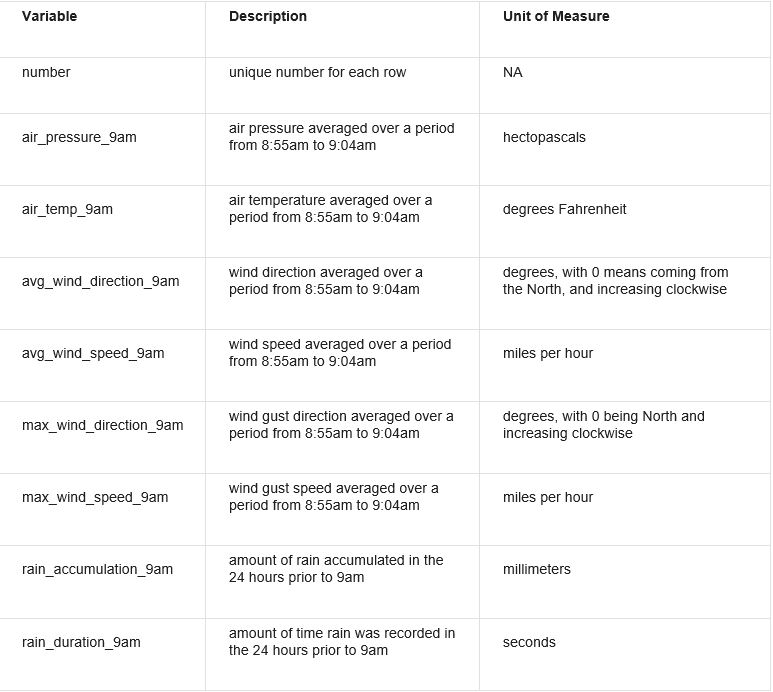

#Show column details
The first step in an exploratory data analysis is to check out the schema of the dataframe. This will give you an overview of the columns in the dataframe along with their data types.



In [26]:
df.printSchema()
#you can use df.columns to check the columns without datatypes!

root
 |-- number: integer (nullable = true)
 |-- air_pressure_9am: double (nullable = true)
 |-- air_temp_9am: double (nullable = true)
 |-- avg_wind_direction_9am: double (nullable = true)
 |-- avg_wind_speed_9am: double (nullable = true)
 |-- max_wind_direction_9am: double (nullable = true)
 |-- max_wind_speed_9am: double (nullable = true)
 |-- rain_accumulation_9am: double (nullable = true)
 |-- rain_duration_9am: double (nullable = true)
 |-- relative_humidity_9am: double (nullable = true)
 |-- relative_humidity_3pm: double (nullable = true)



#Display Rows

Just like in Pandas Dataframe you have the df.head() function, here you have the show() function. You can provide the number of rows you want to print within the parenthesis.

In [27]:
df.show(5)

+------+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|number| air_pressure_9am|      air_temp_9am|avg_wind_direction_9am|avg_wind_speed_9am|max_wind_direction_9am|max_wind_speed_9am|rain_accumulation_9am|rain_duration_9am|relative_humidity_9am|relative_humidity_3pm|
+------+-----------------+------------------+----------------------+------------------+----------------------+------------------+---------------------+-----------------+---------------------+---------------------+
|     0|918.0600000000087| 74.82200000000041|                 271.1| 2.080354199999768|    295.39999999999986| 2.863283199999908|                  0.0|              0.0|    42.42000000000046|   36.160000000000494|
|     1|917.3476881177097| 71.40384263106537|    101.93517935618371|2.4430092157340217|    140.47154847112498|3.5333236016106238|               

#Print summary statistics.
 We can print the summary statistics for all the columns using the describe() method:

In [30]:
df.describe()

DataFrame[summary: string, number: string, air_pressure_9am: string, air_temp_9am: string, avg_wind_direction_9am: string, avg_wind_speed_9am: string, max_wind_direction_9am: string, max_wind_speed_9am: string, rain_accumulation_9am: string, rain_duration_9am: string, relative_humidity_9am: string, relative_humidity_3pm: string]

as you can see the output is not very clear, let's try to transpose the output (rows to columns)

In [31]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
number,1095,547.0,316.24357700987383,0,1094
air_pressure_9am,1092,918.8825513138094,3.184161180386833,907.9900000000024,929.3200000000012
air_temp_9am,1090,64.93300141287072,11.175514003175877,36.752000000000685,98.90599999999992
avg_wind_direction_9am,1091,142.2355107005759,69.13785928889189,15.500000000000046,343.4
avg_wind_speed_9am,1092,5.50828424225493,4.5528134655317185,0.69345139999974,23.554978199999763
max_wind_direction_9am,1092,148.95351796516923,67.23801294602953,28.89999999999991,312.19999999999993
max_wind_speed_9am,1091,7.019513529175272,5.598209170780958,1.1855782000000479,29.84077959999996
rain_accumulation_9am,1089,0.20307895225211126,1.5939521253574893,0.0,24.01999999999907
rain_duration_9am,1092,294.1080522756142,1598.0787786601481,0.0,17704.0


We can also see the summary statistics for just one column:

In [33]:
df.describe("air_temp_9am").show()

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1090|
|   mean| 64.93300141287072|
| stddev|11.175514003175877|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+



Let's count the number of columns and rows in the DataFrame:

In [34]:
#number of columns
len(df.columns)

11

In [35]:
#number of rows
df.count()

1095

The number of rows in the DataFrame is **1095**, but the summary statistics for **air_pressure_9am** says there are only **1092** rows. These are different since 1095 - 1092 = 3 rows have **missing values**.

#Drop rows with missing values.
 Let's drop the rows with missing values in the air_pressure_9am column:

In [36]:
df2 = df.na.drop(subset=['air_pressure_9am'])

Now let's see the total number of rows:

In [37]:
df2.count()

1092

The total number of rows and number of rows in the summary statistics are now the same.

#Compute correlation between two columns
We can compute the correlation between two columns in a DataFrame by using the corr() method. Let's compute the correlation between rain_accumulation_9am and rain_duration_9am:

In [39]:
df2.stat.corr("rain_accumulation_9am","rain_duration_9am")

0.7298253479609021

#link to another tutorial
If you are interested in Spark: check this EDA tutorial here:
https://www.analyticsvidhya.com/blog/2020/11/a-must-read-guide-on-how-to-work-with-pyspark-on-google-colab-for-data-scientists/